In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="training_set/training_set",
    labels="inferred",
    label_mode="int",
    image_size=(150,150),
    batch_size=16
)

test_ds=keras.utils.image_dataset_from_directory(
    directory="test_set/test_set",
    labels="inferred",
    label_mode="int",
    image_size=(150,150),
    batch_size=16
)



Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [12]:
def process(image,label):
    image =tf.cast(image/255.,tf.float32)
    return image,label
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)


In [13]:
# model

model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.30))
model.add(Dense(1,activation="sigmoid"))


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [15]:
model.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=["accuracy"])

In [16]:
history= model.fit(train_ds,epochs=2,validation_data=test_ds)

Epoch 1/2
501/501 [==============================] - 11s 21ms/step - loss: 0.6569 - accuracy: 0.6239 - val_loss: 0.6867 - val_accuracy: 0.6026
Epoch 2/2
501/501 [==============================] - 11s 21ms/step - loss: 0.5610 - accuracy: 0.7166 - val_loss: 0.5312 - val_accuracy: 0.7370


<function matplotlib.pyplot.show(close=None, block=None)>

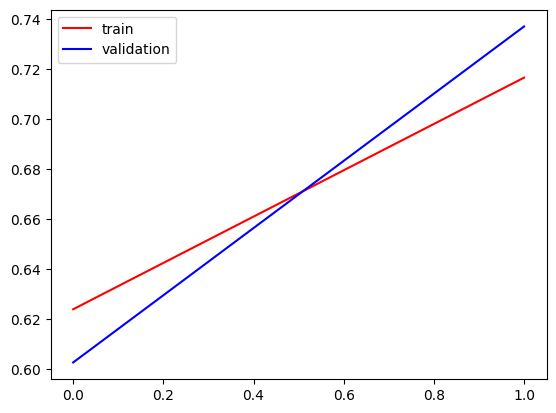

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color='red',label='train')
plt.plot(history.history["val_accuracy"],color='blue',label='validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

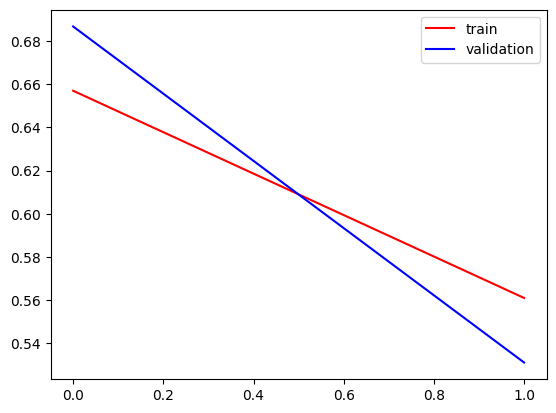

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color='red',label='train')
plt.plot(history.history["val_loss"],color='blue',label='validation')
plt.legend()
plt.show